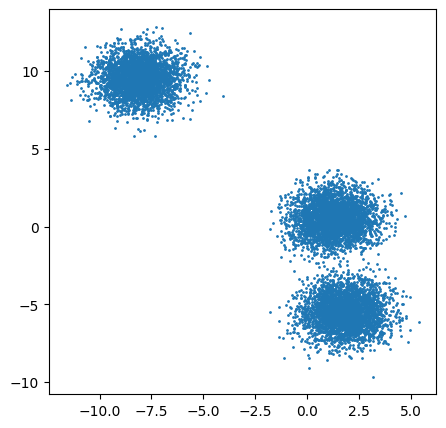

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_points =10000;
n_clusters=3

from sklearn.datasets import make_blobs

Data, labels_true = make_blobs(n_samples=n_points, centers=n_clusters,cluster_std=1)
Data= np.array([Data[:,0], Data[:,1],np.zeros(n_points)])
Data= np.transpose(Data);
fig = plt.figure(figsize=(5, 5))
plt.scatter(Data[:, 0], Data[:, 1],s=1);

In [ ]:
"Distance between two points A and B in Data"

def euclidian_dist(A, B):
    xa,ya,ca =A;
    xb,yb,ca =B;
    dists = np.sqrt((xb-xa)*(xb-xa) + (yb-ya)*(yb-ya) )
    return dists

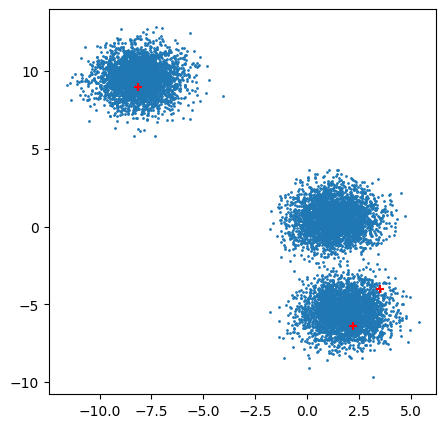

In [ ]:
"randomly select the initial centre of the clusters"
c_centres2 = np.empty([n_clusters, 3])
c_centres = np.empty([n_clusters, 3])

for c in range(n_clusters):
    randI = np.random.randint(n_points)
    c_centres[c] = Data[randI]
    c_centres[c,2]=c;
'''
#================
    randI = np.random.randint(n_points)
    c_centres[c] = Data[randI]
    c_centres[c,2]=c;
#================
'''
fig = plt.figure(figsize=(5, 5))
plt.scatter(Data[:, 0], Data[:, 1],s=1)

plt.scatter(c_centres[:, 0], c_centres[:, 1],marker='+', color='red')

In [ ]:
"centroid assignment"
def assig_centers(Data, n_clusters,c_centres,n_points):
    for p in range(n_points):
        P = Data[p,:];
        C=c_centres[0,:]
        small_distance=euclidian_dist(C, P);
        nearest_c=0;
        for c in range(1,n_clusters):
            C = c_centres[c,:]
            dd = euclidian_dist(C, P)
            if dd < small_distance:
                small_distance = float(dd)
                nearest_c = c
        Data[p,2]= nearest_c;




In [ ]:
"Run a Kmeans untill there centres are not moving less than a pixel"
#while improvment > 1
import array
Err = []
c_norm=1

while c_norm > 0.01:
    new_centres=0*c_centres;
    for p in range(n_points):
        c = int(Data[p,2])
        new_centres[c,0] = new_centres[c,0]+ Data[p,0];
        new_centres[c,1] = new_centres[c,1]+ Data[p,1];
        new_centres[c,2] = new_centres[c,2]+ 1;"counting how many points belong to the cluster"

    for c in range(n_clusters):
        if new_centres[c,2] > 0:
            new_centres[c]=1/float(new_centres[c,2])*new_centres[c];
        new_centres[c,2]=c;

    XX=new_centres[:,0:2]-c_centres[:,0:2]
    c_norm = np.linalg.norm(XX)

    Err.append(c_norm)
    print(c_norm)
    c_centres=new_centres;

    assig_centers(Data, n_clusters,c_centres,n_points);



15.892306243406887
10.292384188196051
2.910953303283513
0.4237675340303111
0.006548528738369155


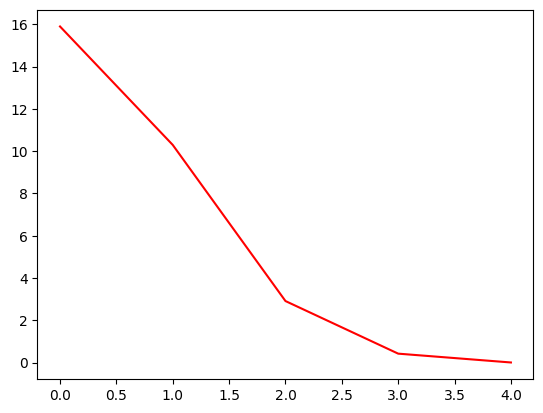

In [ ]:
plt.plot(Err,c='red')

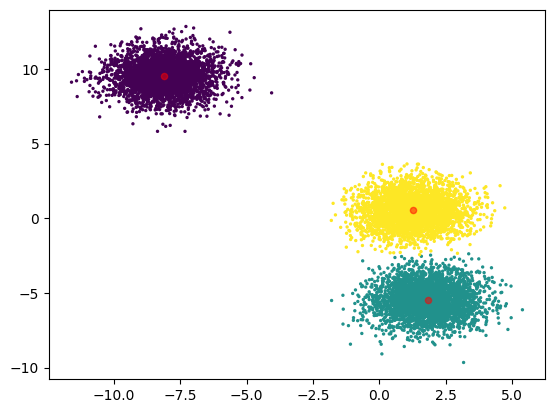

In [ ]:
cl=Data[:,2]
cl = cl.astype(int)
plt.scatter(Data[:, 0], Data[:, 1], c=cl, s=2, cmap='viridis')
plt.scatter(c_centres[:, 0], c_centres[:, 1], c='red', s=20, alpha=0.5);